# Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,8)

In [2]:
df = pd.read_csv("Data Analyst - Test Data - US.csv")

In [3]:
pd.options.display.max_colwidth = 800
df.head(10)

,Review,date,Location
0,"I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n \n Read more\n Read less",2019/08/20,Sebastian
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok\n \n Read more\n Read less,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on my last three trips to New York.\n \n Read more\n Read less,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.\n \n Read more\n Read less,2019/08/20,NaN
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff\n \n Read more\n Read less",2019/08/19,Palm Harbor
5,All the options for fun were great! Do wish there were a better policy on the lazy river floats. Lots of people\n Hoarding them.\n \n Read more\n Read less,2019/08/19,NaN
6,Old. Musty. Motel. \n Bath need an update asap\n !!!!!!\n \n Read more\n Read less,2019/08/19,NaN
7,Loved the layout of the hotel and the relaxing pool area.\n Only con was housekeeping/maintenance staff passing the room with carts and speaking loudly on radios at 7-7:30 am.\n \n Read more\n Read less,2019/08/19,NaN
8,My wife and I loved everything about it. It’s close to everything and everywhere. \n We will be recommending to others and we will definitely be back.\n \n Read more\n Read less,2019/08/19,NaN
9,"rooms were very small, was told i had a complimentary upgrade to a empire state building view room but it was a regular room, everything else was ok.\n \n Read more\n Read less",2019/08/19,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [5]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

# Performing Data Cleaning

## What should do for cleaning this dataset ??
1. From the <b>'Review'</b> column punctutaion and other unnecessary word I need to remove, also make all word in lower case.
2. The <b>'date'</b> column needs to be convert pandas timestamp format.
3. The <b>'Location'</b> column have lots of missing or nan value. I will fill those value with forward fill method.\
    The decision of forward filling is solely on me. and it's completely personal.\
    I understand the 'nan' value representing their previous value, so they
    did not fill the same value many times.

In [6]:
df['Review'] = df['Review'].astype(str)

## Importing String Manipulation Libraries

In [7]:
import nltk
import string

In [8]:
def remove_punct(text):
    text_punct_rmv = [char for char in text if char not in string.punctuation]
    text_punct_rmv_joined = "".join(text_punct_rmv)
    return text_punct_rmv_joined.lower()

## 'Review' - Column

In [9]:
df['Review'] = df['Review'].apply(remove_punct)

In [10]:
df.head()

,Review,date,Location
0,i was very impressed with the resort\n great staff at the main resort pool bar we had a blast with them\n clean professional staff great location and very reasonable\n \n read more\n read less,2019/08/20,Sebastian
1,the rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok\n \n read more\n read less,2019/08/20,Los Angeles
2,great location i have stayed at this hotel on my last three trips to new york\n \n read more\n read less,2019/08/20,Georgia
3,the hotel was adequate for my stay the strips in the bathtub were useless as i fell while taking a shower i asked the front desk staff several times to get a bath mat but they never did management was unresponsive to my request which was very poor someone should have gone to a dollar store and gotten a bath mat breakfast was good but it would have been nice to have had yogurt andor cottage cheese on the buffet\n \n read more\n read less,2019/08/20,NaN
4,great location room was large and spacious parking was easy and we appreciated the friendly staff\n \n read more\n read less,2019/08/19,Palm Harbor


Noticed there is <b>'\n'</b> and <b>'read more read less'</b>. and these will not help me detect sentiment. I need to remove these unnecessary word

In [11]:
df['Review'] = df['Review'].apply(lambda x: x.replace('\n',''))

df['Review'] = df['Review'].apply(lambda x: x.replace('read',''))
df['Review'] = df['Review'].apply(lambda x: x.replace('more',''))
df['Review'] = df['Review'].apply(lambda x: x.replace('less',''))

In [12]:
df.head()

,Review,date,Location
0,i was very impressed with the resort great staff at the main resort pool bar we had a blast with them clean professional staff great location and very reasonable,2019/08/20,Sebastian
1,the rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,2019/08/20,Los Angeles
2,great location i have stayed at this hotel on my last three trips to new york,2019/08/20,Georgia
3,the hotel was adequate for my stay the strips in the bathtub were use as i fell while taking a shower i asked the front desk staff several times to get a bath mat but they never did management was unresponsive to my request which was very poor someone should have gone to a dollar store and gotten a bath mat breakfast was good but it would have been nice to have had yogurt andor cottage cheese on the buffet,2019/08/20,NaN
4,great location room was large and spacious parking was easy and we appreciated the friendly staff,2019/08/19,Palm Harbor


## 'date' - Column

In [13]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)

In [14]:
df.head()

,Review,date,Location
0,i was very impressed with the resort great staff at the main resort pool bar we had a blast with them clean professional staff great location and very reasonable,2019-08-20,Sebastian
1,the rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,2019-08-20,Los Angeles
2,great location i have stayed at this hotel on my last three trips to new york,2019-08-20,Georgia
3,the hotel was adequate for my stay the strips in the bathtub were use as i fell while taking a shower i asked the front desk staff several times to get a bath mat but they never did management was unresponsive to my request which was very poor someone should have gone to a dollar store and gotten a bath mat breakfast was good but it would have been nice to have had yogurt andor cottage cheese on the buffet,2019-08-20,NaN
4,great location room was large and spacious parking was easy and we appreciated the friendly staff,2019-08-19,Palm Harbor


In [15]:
print(min(df['date']))
print(max(df['date']))

2018-08-01 00:00:00
2019-08-20 00:00:00


## Here is almost 1 year of review.

## 'Location' - Column

In [16]:
df['Location'].fillna(method='ffill',inplace=True)

### The decision to forward filling is solely on me. I did it from past experience. and I can't give any specific reason or fact for doing the same here.

In [18]:
df.head()

,Review,date,Location
0,i was very impressed with the resort great staff at the main resort pool bar we had a blast with them clean professional staff great location and very reasonable,2019-08-20,Sebastian
1,the rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,2019-08-20,Los Angeles
2,great location i have stayed at this hotel on my last three trips to new york,2019-08-20,Georgia
3,the hotel was adequate for my stay the strips in the bathtub were use as i fell while taking a shower i asked the front desk staff several times to get a bath mat but they never did management was unresponsive to my request which was very poor someone should have gone to a dollar store and gotten a bath mat breakfast was good but it would have been nice to have had yogurt andor cottage cheese on the buffet,2019-08-20,Georgia
4,great location room was large and spacious parking was easy and we appreciated the friendly staff,2019-08-19,Palm Harbor


In [19]:
hotel = df.copy()

# Importing TextBlob

In [20]:
from textblob import TextBlob as tb # for sentiment analysis

## As the dataset does not come with any column that tells the sentiment of the user reviews. I need to detect it for further analysis.

## There was other way from textblob,  That I can feed this dataset in to another Machine Learning model to detecting sentiment behind these comments. But I choose using textblob.


In [21]:
hotel['Review Polarity'] = hotel['Review'].apply(lambda x: tb(x).sentiment.polarity)
hotel['Review Subjectivity'] = hotel['Review'].apply(lambda x: tb(x).sentiment.subjectivity)

In [22]:
hotel['Review Polarity'] = hotel['Review Polarity'].apply(lambda x: '{:.2f}'.format(x))
hotel['Review Subjectivity'] = hotel['Review Subjectivity'].apply(lambda x: '{:.2f}'.format(x))

In [23]:
hotel.head(10)

,Review,date,Location,Review Polarity,Review Subjectivity
0,i was very impressed with the resort great staff at the main resort pool bar we had a blast with them clean professional staff great location and very reasonable,2019-08-20,Sebastian,0.50,0.63
1,the rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,2019-08-20,Los Angeles,0.25,0.56
2,great location i have stayed at this hotel on my last three trips to new york,2019-08-20,Georgia,0.31,0.42
3,the hotel was adequate for my stay the strips in the bathtub were use as i fell while taking a shower i asked the front desk staff several times to get a bath mat but they never did management was unresponsive to my request which was very poor someone should have gone to a dollar store and gotten a bath mat breakfast was good but it would have been nice to have had yogurt andor cottage cheese on the buffet,2019-08-20,Georgia,0.22,0.54
4,great location room was large and spacious parking was easy and we appreciated the friendly staff,2019-08-19,Palm Harbor,0.40,0.52
5,all the options for fun were great do wish there were a better policy on the lazy river floats lots of people hoarding them,2019-08-19,Palm Harbor,0.34,0.61
6,old musty motel bath need an update asap,2019-08-19,Palm Harbor,0.10,0.20
7,loved the layout of the hotel and the relaxing pool area only con was housekeepingmaintenance staff passing the room with carts and speaking loudly on radios at 7730 am,2019-08-19,Palm Harbor,0.27,0.87
8,my wife and i loved everything about it it’s close to everything and everywhere we will be recommending to others and we will definitely be back,2019-08-19,Palm Harbor,0.35,0.40
9,rooms were very small was told i had a complimentary upgrade to a empire state building view room but it was a regular room everything else was ok,2019-08-19,Palm Harbor,0.12,0.40


<b>Polarity</b>: How positive or negative a word is. -1 is very negative. +1 is very positive.\
<b>Subjectivity</b>: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In here i will not use Subjectivity score that much, all i need the sentiment score

A function that will give me two category <b>"Positive"</b> and <b>"Negative"</b> depends on Polarity Score

In [24]:
def get_pos_neg(num):
    if num <= 0.00:
        return ('Negative')
    else:
        return ('Positive')

In [69]:
hotel['Review Polarity'] = hotel['Review Polarity'].astype(float)
hotel['Review Subjectivity'] = hotel['Review Subjectivity'].astype(float)

In [26]:
hotel['Review Category'] = hotel['Review Polarity'].apply(get_pos_neg)

In [27]:
hotel.head()

,Review,date,Location,Review Polarity,Review Subjectivity,Review Category
0,i was very impressed with the resort great staff at the main resort pool bar we had a blast with them clean professional staff great location and very reasonable,2019-08-20,Sebastian,0.50,0.63,Positive
1,the rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,2019-08-20,Los Angeles,0.25,0.56,Positive
2,great location i have stayed at this hotel on my last three trips to new york,2019-08-20,Georgia,0.31,0.42,Positive
3,the hotel was adequate for my stay the strips in the bathtub were use as i fell while taking a shower i asked the front desk staff several times to get a bath mat but they never did management was unresponsive to my request which was very poor someone should have gone to a dollar store and gotten a bath mat breakfast was good but it would have been nice to have had yogurt andor cottage cheese on the buffet,2019-08-20,Georgia,0.22,0.54,Positive
4,great location room was large and spacious parking was easy and we appreciated the friendly staff,2019-08-19,Palm Harbor,0.40,0.52,Positive


## Starting Analysis

First let's check how much positive and negative feedback are here.

In [28]:
hotel_cat = hotel['Review Category'].value_counts()
hotel_cat

Positive    4675
Negative    1773
Name: Review Category, dtype: int64

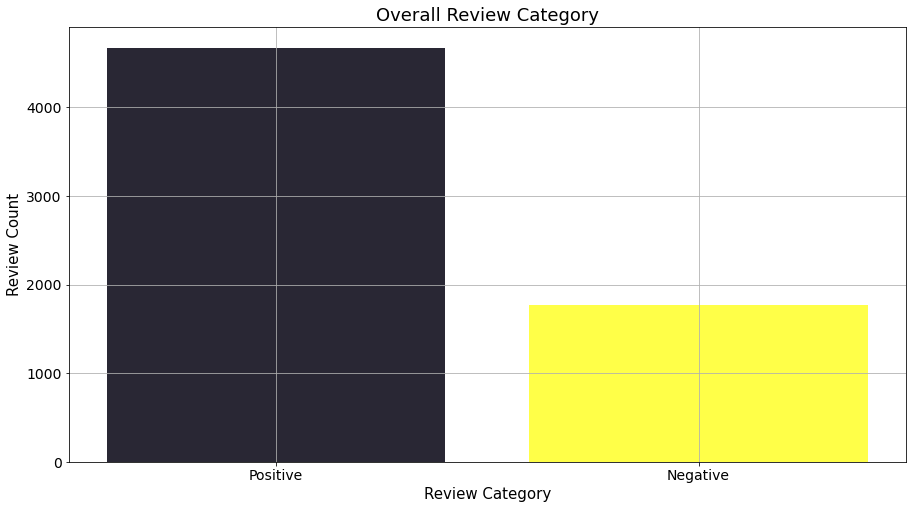

In [29]:
plt.bar(hotel_cat.index, hotel_cat.values, color=['#292734','#FFFF48'])
plt.title("Overall Review Category", fontsize=18)
plt.xlabel("Review Category", fontsize=15)
plt.ylabel('Review Count', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

## Checking Location Column

In [30]:
print(hotel['Location'].unique())
print(hotel['Location'].nunique())

['Sebastian' 'Los Angeles' 'Georgia' ... 'India' 'Malaysia'
 'Trinidad and Tobago']
1082


1082 cities are there

In [31]:
overall_hotel_loc = hotel['Location'].value_counts()[:20]
overall_hotel_loc

CT                          917
United States of America    116
New York                    105
California                   72
San Jose                     65
Chicago                      53
New York, NY                 48
Toronto                      42
Seattle                      37
Boston                       37
Los Angeles                  37
Philadelphia, PA             37
NY                           36
Florida                      36
Washington, DC               34
Tampa                        33
Miami                        33
Washington DC                30
NYC                          30
Dinuba California            29
Name: Location, dtype: int64

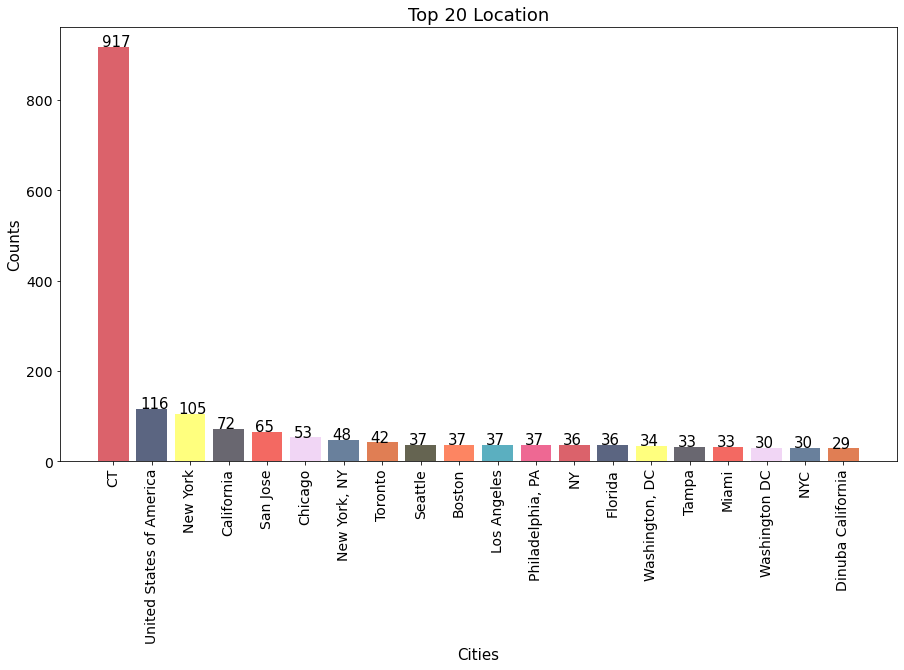

In [32]:
plt.bar(overall_hotel_loc.index, overall_hotel_loc.values, color=['#CD202D','#15244C','#FFFF48','#292734','#EF2920','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865'],alpha=0.7)

plt.title("Top 20 Location", fontsize= 18)
plt.xlabel('Cities', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

count = 0
for i in overall_hotel_loc.values:
    plt.text(count-0.3,i+1,str(i),size=15,color='black') 
    count+=1
plt.show()

According to the dataset these are top 20 cities to give review.

The <b>' CT '</b> cities is highest to give review

Filtering <b>" CT "</b> Location in to a different dataframe

In [33]:
CT_hotel = hotel[hotel['Location'] == 'CT']

CT_hotel.head()

,Review,date,Location,Review Polarity,Review Subjectivity,Review Category
2659,wonderful historic property clean great water pressure in shower clean friendly people clean convenient location did i mention clean cleanliness is very important to me great room with a view thanks to the front desk,2019-01-28,CT,0.47,0.64,Positive
4010,the hotel was nicely located and the staff were awesome however the remote control and coffee maker were filthy and unusable there was no top sheet on the bed just a thin comforter,2018-11-10,CT,0.01,0.76,Positive
4011,the tryp hotel was very disappointing the lobby felt like a dormitory or a mcdonalds no place to sit room was dimly lit and decor strange but not at all in a cool old way no place to put suitcases so they were on the beds housekeeping did not come until we called twice someone finally cleaned room around 530 pm the pillows felt like someone had stuffed them with socks as they were very lumpy and very small coffee machine in room never worked somehow in this day and age they managed to find a tv without hd so picture quality was very poor towels were so scratchy they felt like sandpaper it was a hard rain one morning but of course the hotel did nothing to offer umbrellas for their guests to use never ate anything there can only imagine the food would be subpar i would suggest you stay ...,2018-11-10,CT,-0.11,0.60,Negative
4012,nan,2018-11-10,CT,0.00,0.00,Negative
4013,beautiful facilities great customer service convenient to shopping and entertainment,2018-11-10,CT,0.82,0.88,Positive


In [34]:
len(CT_hotel) #checking the length of the dataframe, to assured the filtering.

917

In [35]:
CT_hotel_cat = CT_hotel['Review Category'].value_counts()
CT_hotel_cat

Positive    769
Negative    148
Name: Review Category, dtype: int64

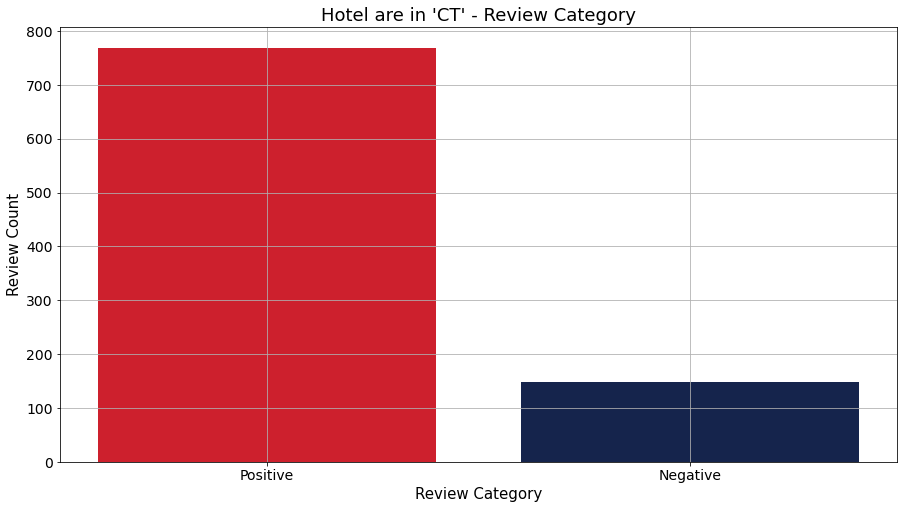

In [36]:
plt.bar(CT_hotel_cat.index, CT_hotel_cat.values, color=['#CD202D','#15244C'])
plt.title("Hotel are in 'CT' - Review Category", fontsize=18)
plt.xlabel("Review Category", fontsize=15)
plt.ylabel('Review Count', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()


Creating another column "Month" to extract month from date

In [37]:
import datetime
CT_hotel['Month'] = CT_hotel['date'].dt.month

<ipython-input-37-22f467c5716f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CT_hotel['Month'] = CT_hotel['date'].dt.month


In [38]:
m = {
        1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
        }


CT_hotel['Month Name'] = CT_hotel['Month'].map(m)

<ipython-input-38-fa9b62e58f47>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CT_hotel['Month Name'] = CT_hotel['Month'].map(m)


In [39]:
CT_hotel.head()

,Review,date,Location,Review Polarity,Review Subjectivity,Review Category,Month,Month Name
2659,wonderful historic property clean great water pressure in shower clean friendly people clean convenient location did i mention clean cleanliness is very important to me great room with a view thanks to the front desk,2019-01-28,CT,0.47,0.64,Positive,1,Jan
4010,the hotel was nicely located and the staff were awesome however the remote control and coffee maker were filthy and unusable there was no top sheet on the bed just a thin comforter,2018-11-10,CT,0.01,0.76,Positive,11,Nov
4011,the tryp hotel was very disappointing the lobby felt like a dormitory or a mcdonalds no place to sit room was dimly lit and decor strange but not at all in a cool old way no place to put suitcases so they were on the beds housekeeping did not come until we called twice someone finally cleaned room around 530 pm the pillows felt like someone had stuffed them with socks as they were very lumpy and very small coffee machine in room never worked somehow in this day and age they managed to find a tv without hd so picture quality was very poor towels were so scratchy they felt like sandpaper it was a hard rain one morning but of course the hotel did nothing to offer umbrellas for their guests to use never ate anything there can only imagine the food would be subpar i would suggest you stay ...,2018-11-10,CT,-0.11,0.60,Negative,11,Nov
4012,nan,2018-11-10,CT,0.00,0.00,Negative,11,Nov
4013,beautiful facilities great customer service convenient to shopping and entertainment,2018-11-10,CT,0.82,0.88,Positive,11,Nov


In [40]:
CT_hotel_mon = CT_hotel['Month Name'].value_counts()
CT_hotel_mon

Jun    145
May    121
Jul     92
Mar     88
Feb     84
Sep     71
Nov     71
Oct     66
Aug     66
Dec     57
Jan     36
Apr     20
Name: Month Name, dtype: int64

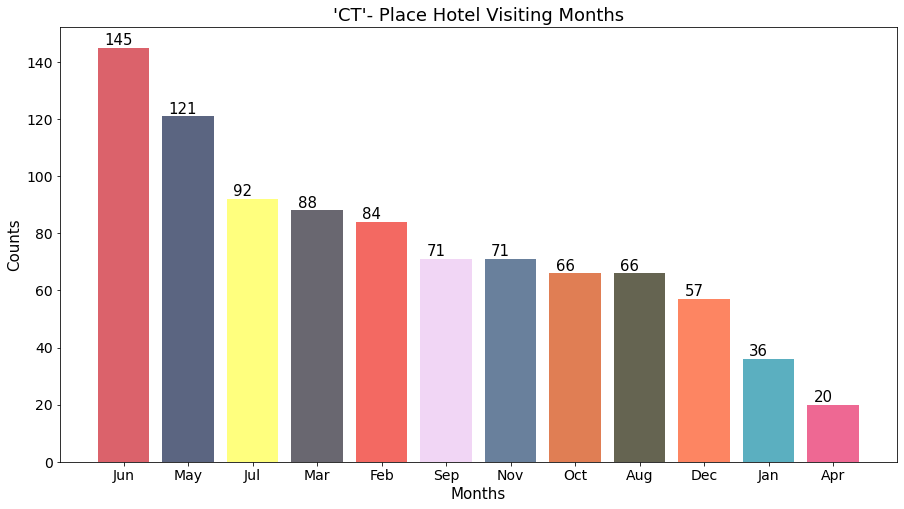

In [41]:
plt.bar(CT_hotel_mon.index, CT_hotel_mon.values, color=['#CD202D','#15244C','#FFFF48','#292734','#EF2920','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865'],alpha=0.7)

plt.title("'CT'- Place Hotel Visiting Months", fontsize= 18)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

count = 0
for i in CT_hotel_mon.values:
    plt.text(count-0.3,i+1,str(i),size=15,color='black') 
    count+=1

According to the dataset <b>"Jun"</b>, <b>"May"</b>, <b>"Jul"</b>, people are most stays at hotel at <b>"CT"</b>.

## Working with 'date' column

Like CT_hotel, Creating month column for main dataframe.

In [42]:
hotel['Month'] = hotel['date'].dt.month
hotel['Month Name'] = hotel['Month'].map(m)

In [43]:
hotel.head()

,Review,date,Location,Review Polarity,Review Subjectivity,Review Category,Month,Month Name
0,i was very impressed with the resort great staff at the main resort pool bar we had a blast with them clean professional staff great location and very reasonable,2019-08-20,Sebastian,0.50,0.63,Positive,8,Aug
1,the rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,2019-08-20,Los Angeles,0.25,0.56,Positive,8,Aug
2,great location i have stayed at this hotel on my last three trips to new york,2019-08-20,Georgia,0.31,0.42,Positive,8,Aug
3,the hotel was adequate for my stay the strips in the bathtub were use as i fell while taking a shower i asked the front desk staff several times to get a bath mat but they never did management was unresponsive to my request which was very poor someone should have gone to a dollar store and gotten a bath mat breakfast was good but it would have been nice to have had yogurt andor cottage cheese on the buffet,2019-08-20,Georgia,0.22,0.54,Positive,8,Aug
4,great location room was large and spacious parking was easy and we appreciated the friendly staff,2019-08-19,Palm Harbor,0.40,0.52,Positive,8,Aug


In [44]:
hotel_mon = hotel['Month Name'].value_counts()
hotel_mon

Aug    728
Dec    630
Mar    605
Apr    593
Jul    549
May    526
Oct    524
Nov    519
Jan    513
Sep    481
Feb    418
Jun    362
Name: Month Name, dtype: int64

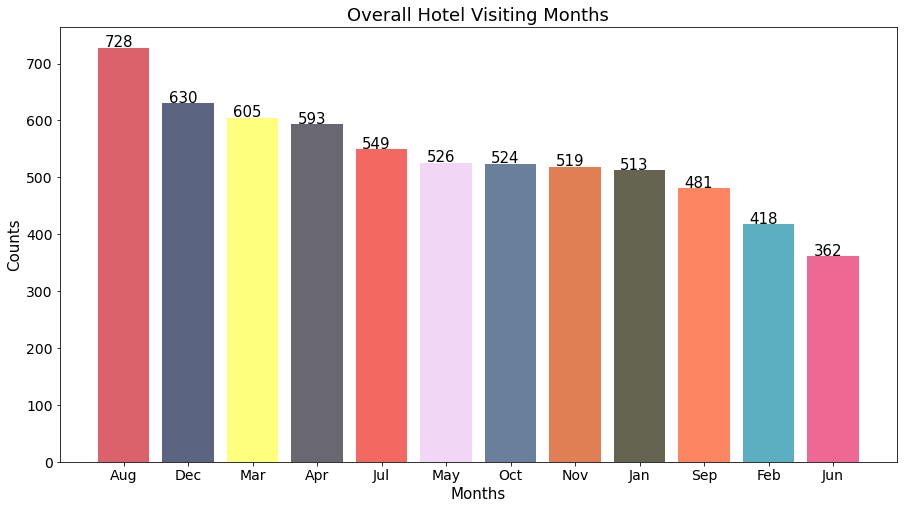

In [45]:
plt.bar(hotel_mon.index, hotel_mon.values, color=['#CD202D','#15244C','#FFFF48','#292734','#EF2920','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865'],alpha=0.7)

plt.title("Overall Hotel Visiting Months", fontsize= 18)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

count = 0
for i in hotel_mon.values:
    plt.text(count-0.3,i+1,str(i),size=15,color='black') 
    count+=1
plt.show()

Overall Visiting months are differents from 'CT' \
Here 'Aug', 'Dec', and 'Mar' are the most visiting months

## Further with Polarity

### Creating a function that will give a depth of review from these comments

In [61]:
def depth_rvw(pol):
    if pol<=0.00:
        return ("Negative")
    elif pol <=0.20:
        return ("somewhat satisfied")
    elif pol <=0.50:
        return ("satisfied")
    elif pol>0.50:
        return ("very satisfied")

In [62]:
hotel['Depth Review'] = hotel['Review Polarity'].apply(depth_rvw)

### Checking the result

In [63]:
hotel[hotel['Review Polarity']>0.50].head(5)

,Review,date,Location,Review Polarity,Review Subjectivity,Review Category,Month,Month Name,Depth Review
12,location was great lobby area was nice but room needs to be upgraded,2019-08-19,California,0.70,0.88,Positive,8,Aug,very satisfied
22,awesome location easy access to sights and subway,2019-08-18,Redding,0.72,0.92,Positive,8,Aug,very satisfied
28,beautiful art deco building foyer is very ornate and stylish,2019-08-17,Jacksonville,0.52,0.77,Positive,8,Aug,very satisfied
34,i have stayed for 5 nights great service affordable price,2019-08-17,"Grand Cayman, Cayman Islands",0.80,0.75,Positive,8,Aug,very satisfied
37,was a great place the room had ants but that comes with outside doors lobby service was great though,2019-08-16,"Grand Cayman, Cayman Islands",0.53,0.52,Positive,8,Aug,very satisfied


In [65]:
hotel[hotel['Review Polarity']<0.20].head(5)

,Review,date,Location,Review Polarity,Review Subjectivity,Review Category,Month,Month Name,Depth Review
6,old musty motel bath need an update asap,2019-08-19,Palm Harbor,0.10,0.20,Positive,8,Aug,somewhat satisfied
9,rooms were very small was told i had a complimentary upgrade to a empire state building view room but it was a regular room everything else was ok,2019-08-19,Palm Harbor,0.12,0.40,Positive,8,Aug,somewhat satisfied
18,it was great for what we needed a place to sleep parking was 20 a day which isn’t too bad for that area we were on the floor that the pool was located on so there was a constant flow of loud people storming down the hallway poorly set up since that is the only way to the pool they probably put us there since we used a third party booking site,2019-08-19,Redding,-0.04,0.55,Negative,8,Aug,Negative
21,the room is tiny the building is old and worn on inside needs updating the walls are thin the bathroom needs updating flooring is worn and ripping staff wasn’t the friendliest plan on walking 25 minutes to time square security was the only good thing with this hotel be prepared they add on fees if you purchase through expedia they call it resort fees why i have no idea it’s not a resort,2019-08-18,Redding,0.08,0.63,Positive,8,Aug,somewhat satisfied
23,基本的に問題なしでした。 清潔で防音も普通な方で、水回りも清潔でシャワーの水圧も問題なしです。 ただ、歯ブラシやスリッパ、バスローブなどはありません。 シャンプー、石鹸、ズボンプレッサー、冷蔵庫などはありました。,2019-08-18,Redding,0.00,0.00,Negative,8,Aug,Negative


In [66]:
hotel_depth = hotel['Depth Review'].value_counts()
hotel_depth

satisfied             2280
Negative              1773
somewhat satisfied    1309
very satisfied        1086
Name: Depth Review, dtype: int64

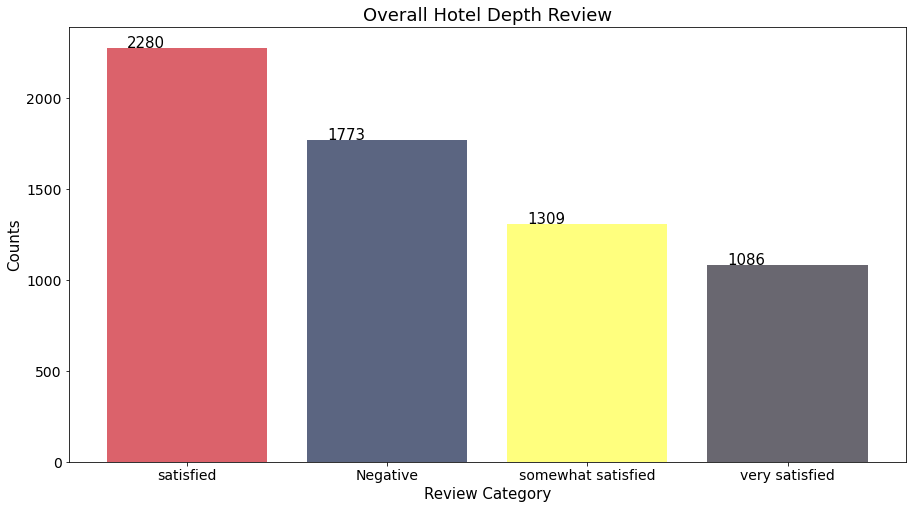

In [68]:
plt.bar(hotel_depth.index, hotel_depth.values, color=['#CD202D','#15244C','#FFFF48','#292734'],alpha=0.7)

plt.title("Overall Hotel Depth Review", fontsize= 18)
plt.xlabel('Review Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

count = 0
for i in hotel_depth.values:
    plt.text(count-0.3,i+1,str(i),size=15,color='black') 
    count+=1
plt.show()

### Most of the reviews are belong between 0.2 to 0.5 and they are satisfied with service.
### And second most number they are given a Negative review

### By exploring the dataset I found there are lots of reviews that are written not in English but other languages. and the sentiment detection algorithm can't detect their sentiment so give the Polarity and Subjectivity 0.

In [72]:
zero_review = hotel[(hotel['Review Polarity'] ==0.00) & (hotel['Review Subjectivity']==0.00)]

In [73]:
zero_review.head(30)

,Review,date,Location,Review Polarity,Review Subjectivity,Review Category,Month,Month Name,Depth Review
23,基本的に問題なしでした。 清潔で防音も普通な方で、水回りも清潔でシャワーの水圧も問題なしです。 ただ、歯ブラシやスリッパ、バスローブなどはありません。 シャンプー、石鹸、ズボンプレッサー、冷蔵庫などはありました。,2019-08-18,Redding,0.0,0.0,Negative,8,Aug,Negative
31,les chambres familiales sont pratiques nous étions 7 et cest agréable dêtre tous ensemble cependant le personnel est exécrable lindividu à l’accueil sest permis de dire à mon mari quil était trop lent lors de lenregistrement cest inacceptable de plus la climatisation est extrêmement bruyante plusieurs dentre nous ont eu beaucoup de difficulté à dormir,2019-08-17,Montréal,0.0,0.0,Negative,8,Aug,Negative
33,nan,2019-08-17,"Grand Cayman, Cayman Islands",0.0,0.0,Negative,8,Aug,Negative
47,vétuste mérite un sacré rafraîchissement emplacement idéal,2019-08-14,Toulon,0.0,0.0,Negative,8,Aug,Negative
49,el aire acondicionado goteaba y la alfombra estaba empapada y con humedad,2019-08-14,Toulon,0.0,0.0,Negative,8,Aug,Negative
55,comodo per la posizione ma hotel fatiscente camera e bagno troppo piccoli e la quarta stella gliel hanno regalata,2019-08-13,Lake Buena Vista - Orlando,0.0,0.0,Negative,8,Aug,Negative
61,todo excelente muy buenas instalaciones y excelente servico,2019-08-12,México,0.0,0.0,Negative,8,Aug,Negative
84,nos encanto tanto el trato recibido en la recepcion como la ayuda del sr sebastiansuper amable y eficiente muchisimas gracias,2019-08-11,Tokyo,0.0,0.0,Negative,8,Aug,Negative
86,didn’t like being charged for parking and resort fee,2019-08-11,Apollo Beach,0.0,0.0,Negative,8,Aug,Negative
87,camera non disponibile e sporca lunghissime code alla reception,2019-08-11,Apollo Beach,0.0,0.0,Negative,8,Aug,Negative


### By checking the output it is clear these comments are written not in English. and it put an impact on my previous output.

In [74]:
len(zero_review)

599

### There are 599 rows, where all comments are not written in English. or algorithm fail to detect their sentiment

## I'm finishing here